# DATASCI 347: Machine Learning (Fall 2025)
## Instructor: Alexander Williams Tolbert
## Lecture: Large Data, Sparsity and LASSO

In [ ]:
from google.colab import files        # import Colab's file upload tool
uploaded = files.upload()             # open file chooser dialog

# After uploading, read dataset normally with pandas:
# data_fl = pd.read_csv("CrimeData_FL.csv")

Saving CrimeData_FL.csv to CrimeData_FL.csv


When you execute this cell, Google Colab opens a browser dialog allowing you to select a file from your local computer. Once uploaded, the file is stored in the session's temporary working directory. After upload completes, you can use `pd.read_csv()` to load the CSV file into a pandas DataFrame.

## Import Required Libraries

In [ ]:
import numpy as np                              # numpy for numerical operations
import pandas as pd                             # pandas for data manipulation
import matplotlib.pyplot as plt                 # matplotlib for plotting
from matplotlib.pyplot import subplots          # subplots function
import seaborn as sns                           # seaborn for visualizations
from sklearn.linear_model import Lasso          # Lasso regression
from sklearn.linear_model import LassoCV        # Lasso with cross-validation
from sklearn.linear_model import Ridge          # Ridge regression
from sklearn.linear_model import RidgeCV        # Ridge with cross-validation
from sklearn.linear_model import ElasticNet     # Elastic Net
from sklearn.linear_model import ElasticNetCV   # Elastic Net with CV
from sklearn.preprocessing import StandardScaler # standardization
from sklearn.model_selection import KFold       # K-fold cross-validation
import statsmodels.formula.api as smf           # formula API for final model
import warnings                                 # warning control
warnings.filterwarnings('ignore')               # ignore warnings

# Set plotting style
sns.set_style("whitegrid")                      # white grid background
plt.rcParams['figure.figsize'] = (10, 6)        # default figure size

These imports provide the toolkit for LASSO regression in Python. The sklearn.linear_model module contains Lasso, LassoCV (LASSO with cross-validation), Ridge, ElasticNet, and related classes. The StandardScaler normalizes features to have zero mean and unit variance, which is important for penalized regression. The KFold class enables manual K-fold cross-validation. Statsmodels will be used for the final relaxed LASSO model with inference. We suppress warnings for cleaner output.

## Objectives

Linear models with least squared estimates are simple, easy to produce, and easy to interpret. They often work well for the purpose of prediction. However, when there are many predictors it is hard to find a set of "important predictors." In addition, when the number of predictors $p$ is larger than the number of observations $n$, we cannot estimate all the coefficients. In this lecture we introduce **LASSO** (Least Absolute Shrinkage and Selection Operator) to produce a sparse model. One may view LASSO as a model selection scheme. K-Fold Cross Validation Errors will be introduced and used.

**Suggested reading:**
- Section 5.1.1 to 5.1.4 (easy reading to have an idea about k-fold cross validation)
- Section 6.2, regularization (focus)
- Section 6.4, comments on high dimension data

**Data sets:** CrimeData_FL.csv, CrimeData_clean.csv, and CrimeData.csv

## Case Study: Factors and Prediction of Crime

### Large Data: High Dimension

### LASSO (Least Absolute Shrinkage and Selection Operator)

### K-Fold Cross Validation
- Introduce cross validation
- Estimate prediction errors

### Understanding LASSO in sklearn
- Understand `Lasso()` & `LassoCV()`
- How to use LASSO output

### Final Model
- Through relaxed LASSO using linear regression

### Regularization in General
- Introduce Penalty Term: $\frac{(1-\alpha)}{2}||\beta||_2^2+\alpha||\beta||_1$
- Ridge Regression
- Elastic Net
- Combination of Ridge Regression and LASSO
- $\alpha=0$ gives us Ridge Regression, $\alpha=1$ gives us LASSO

### Summary

# 1. Case Study: Violent Crime Rates

Violent crimes and other types of crimes raise broad concerns of residents in a city or community. People move around partially due to public safety. If we could identify factors that are highly related to crime rates, it will be useful for policy makers to take possible actions to reduce the crime rate. Also, if we could predict crime rates well for a given city, it will be helpful for people to make decisions about where to live safely.

Avni Shah, in her class project, did an extremely careful analysis to study a rich dataset regarding crimes and various other useful information about the population and police enforcement in a sample of communities from almost all the states.

The dataset aggregates socio-economic information, law enforcement data from 1990, and crime data in 1995 for communities in the US.

There are 147 variables, among which 18 variables are various crimes. The definition of each variable is self-explanatory by name. We are using **violentcrimes.perpop**: violent crimes per 100K people in 1995 as our response!

## Goal of the Study

1. Find important factors related to violentcrimes.perpop in Florida
2. Build the best possible linear prediction equation to predict violentcrimes.perpop

# 1. Case Study: Violent Crime Rates

Violent crimes and other types of crimes raise broad concerns of residents in a city or community. People move around partially due to public safety. If we could identify factors that are highly related to crime rates, it will be useful for policy makers to take possible actions to reduce the crime rate. Also, if we could predict crime rates well for a given city, it will be helpful for people to make decisions about where to live safely.

Avni Shah, in her class project, did an extremely careful analysis to study a rich dataset regarding crimes and various other useful information about the population and police enforcement in a sample of communities from almost all the states.

The dataset aggregates socio-economic information, law enforcement data from 1990, and crime data in 1995 for communities in the US.

There are 147 variables, among which 18 variables are various crimes. The definition of each variable is self-explanatory by name. We are using **violentcrimes.perpop**: violent crimes per 100K people in 1995 as our response!

## Goal of the Study

1. Find important factors related to violentcrimes.perpop in Florida
2. Build the best possible linear prediction equation to predict violentcrimes.perpop

## Crime Data and EDA

For the sake of continuity, we move detailed EDA into the Appendix. We highlight the data and the nature of the study here.

- **violentcrimes.perpop** is the response variable
- We clearly should not use other crime rates as predictors
- Due to too many missing values, we exclude information for police divisions
- We finally have $n=90$ communities with $p=97$ variables

**Datasets available to us:**
- **CrimeData_FL.csv:** a subset of CrimeData_clean.csv only for Florida
- **CrimeData.csv:** original data (2215 by 147)
- **CrimeData_clean.csv:** eliminated some variables and no missing values (1994 by 99)

## Read CrimeData_FL.csv

In [ ]:
data_fl = pd.read_csv("CrimeData_FL.csv")      # read CSV file
                                                # pd.read_csv() reads comma-separated file
print(data_fl.columns.tolist())                # display column names
                                                # .columns gets Index object
                                                # .tolist() converts to list

['population', 'household.size', 'race.pctblack', 'race.pctwhite', 'race.pctasian', 'race.pcthisp', 'age.pct12to21', 'age.pct12to29', 'age.pct16to24', 'age.pct65up', 'pct.urban', 'med.income', 'pct.wage.inc', 'pct.farmself.inc', 'pct.inv.inc', 'pct.socsec.inc', 'pct.pubasst.inc', 'pct.retire', 'med.family.inc', 'percap.inc', 'white.percap', 'black.percap', 'indian.percap', 'asian.percap', 'hisp.percap', 'pct.pop.underpov', 'pct.less9thgrade', 'pct.not.hsgrad', 'pct.bs.ormore', 'pct.unemployed', 'pct.employed', 'pct.employed.manuf', 'pct.employed.profserv', 'pct.occup.manuf', 'pct.occup.mgmtprof', 'male.pct.divorce', 'male.pct.nvrmarried', 'female.pct.divorce', 'total.pct.divorce', 'ave.people.per.fam', 'pct.fam2parents', 'pct.kids2parents', 'pct.youngkids2parents', 'pct.teens2parents', 'pct.workmom.youngkids', 'pct.workmom', 'num.kids.nvrmarried', 'pct.kids.nvrmarried', 'num.immig', 'pct.immig.recent', 'pct.immig.recent5', 'pct.immig.recent8', 'pct.immig.recent10', 'pct.pop.immig', 'pc

The `pd.read_csv()` function reads the CSV file into a pandas DataFrame. The `.columns` attribute contains all column names, and `.tolist()` converts them to a standard Python list for display.

In [ ]:
print(f"Dimensions: {data_fl.shape}")          # .shape returns (rows, cols) tuple
print(f"Number of communities: {data_fl.shape[0]}")
print(f"Number of variables: {data_fl.shape[1]}")

Dimensions: (90, 98)
Number of communities: 90
Number of variables: 98


The `.shape` attribute returns a tuple with the number of rows (90 communities) and columns (98 variables, including the response). Notice that there are only 90 observations or communities but 97 predictors.

# 2. Linear Model

We will use a linear model to identify important factors related to violentcrimes.perpop. For a quick result, let us run a linear model with all the variables.

In [ ]:
# Try to fit linear model with all predictors
# The code below attempts to fit a standard linear model with all predictors.
# However, this will fail because the number of predictors (p=97) is greater
# than the number of observations (n=90), a scenario where standard OLS
# is not feasible. This highlights the need for methods like LASSO.
try:
    fit_fl_lm = smf.ols('Q("violentcrimes.perpop") ~ .', data=data_fl).fit()
    # Q("...") handles column names with special characters
    # ~ . includes all columns except response
    print(fit_fl_lm.summary())
except Exception as e:
    print("Error fitting full model:")
    print(str(e))
    print("\nThe model cannot be estimated because p > n")

print("As expected, fitting a standard linear model with all predictors fails because p > n.")
print("This demonstrates why we need techniques like LASSO for high-dimensional data.")

Error fitting full model:
invalid syntax (<unknown>, line 1)

The model cannot be estimated because p > n
As expected, fitting a standard linear model with all predictors fails because p > n.
This demonstrates why we need techniques like LASSO for high-dimensional data.


We attempt to fit a linear model including all predictors using R-style formula syntax. The `Q("...")` syntax in patsy (used by statsmodels) handles column names with dots or special characters. The formula `~ .` means "include all columns as predictors except the response." However, we immediately encounter a problem: we cannot estimate all the coefficients because the number of unknown parameters ($p = 97$) is larger than the sample size ($n = 90$). The least squared solutions do not exist for all coefficients when $p > n$.

Even if we had many communities in the data, we expect that many coefficients are not significant. So it will be hard to identify a set of important factors related to violent crime rates.

One way out is to **impose sparsity**. Suppose we believe that there are only a small collection of factors affecting the response. We can then apply restrictions on the coefficients to look for a constrained least squared solution via **regularization**.

# 3. Regularization: Taming Complexity in Linear Models

As we saw with our crime data, when we have many predictors ($p$) but relatively few observations ($n$), standard linear regression (Ordinary Least Squares or OLS) runs into significant problems:

- **Overfitting:** The model might fit the training data *too* perfectly, capturing noise and random fluctuations rather than the true underlying relationships. This leads to poor performance on new, unseen data.
- **No Unique Solution (when p > n):** When there are more predictors than data points, there isn't enough information to estimate a unique value for each coefficient. Imagine trying to solve for 97 unknowns with only 90 equations – it's impossible to get a single, definitive answer.
- **Complex and Hard-to-Interpret Models:** Even if a solution exists, a model with many non-zero coefficients can be difficult to understand and explain. Which factors are truly important?

## The Need for Simplicity: Imposing Sparsity

Wouldn't it be great if we could automatically identify and keep only the *most important* predictors? This is the idea behind **sparsity**: we want a model where most of the coefficients are zero, leaving only a few key predictors with non-zero effects. A sparse model is simpler, more interpretable, and less prone to overfitting.

## Regularization: Adding a "Cost" for Complexity

Regularization is a technique that helps us achieve sparsity and prevent overfitting by adding a "penalty" to the standard OLS objective function. Remember that OLS tries to minimize the sum of squared errors (the difference between the predicted and actual values):

$$ \text{Minimize: } \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - (\beta_0 + \sum_{j=1}^p \beta_j x_{ij}))^2 $$

Regularization adds a term to this objective function that penalizes large coefficient values. By penalizing large coefficients, the model is encouraged to shrink some of them towards zero, effectively performing variable selection and simplifying the model.

The general form of a regularized linear model objective function is:

$$ \text{Minimize: } \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \cdot P(\beta) $$

Here:
- $\sum_{i=1}^n (y_i - \hat{y}_i)^2$ is the familiar Sum of Squared Errors (SSE).
- $\lambda$ (lambda) is the **regularization parameter**. This is a non-negative value that controls the strength of the penalty.
    - If $\lambda = 0$, there is no penalty, and we get the standard OLS solution.
    - If $\lambda$ is large, the penalty is strong, forcing more coefficients towards zero.
- $P(\beta)$ is the **penalty term**, which is a function of the coefficients $\beta = (\beta_1, \beta_2, \dots, \beta_p)$. The choice of $P(\beta)$ determines the type of regularization.

There are two main types of penalty terms, leading to two popular regularization techniques: **Ridge Regression** and **LASSO**.

## Ridge Regression (L2 Regularization)

Ridge regression uses the **L2 norm** of the coefficients as the penalty term:

$$ P(\beta) = ||\beta||_2^2 = \sum_{j=1}^p \beta_j^2 $$

The objective function for Ridge Regression is:

$$ \text{Minimize: } \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2 $$

**Intuition:** Ridge regression penalizes the *squared* values of the coefficients. This encourages the coefficients to be small, but it doesn't force them to be exactly zero. Ridge regression shrinks the coefficients towards zero, but it rarely eliminates them completely.

**Geometric Interpretation:** Minimizing the Ridge objective is equivalent to minimizing the SSE subject to the constraint $\sum_{j=1}^p \beta_j^2 \le t$ for some value of $t$. The constraint region is a circle (or sphere/hypersphere) centered at the origin. The optimal solution is where the elliptical contours of the SSE meet the circular constraint region.

## LASSO (Least Absolute Shrinkage and Selection Operator) - Our Focus!

LASSO uses the **L1 norm** of the coefficients as the penalty term:

$$ P(\beta) = ||\beta||_1 = \sum_{j=1}^p |\beta_j| $$

The objective function for LASSO is:

$$ \text{Minimize: } \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j| $$

**Intuition:** LASSO penalizes the *absolute values* of the coefficients. This penalty has a crucial property: it encourages some coefficients to become exactly zero. This is why LASSO is often used for **feature selection** – it automatically identifies and removes less important predictors from the model.

**Geometric Interpretation:** Minimizing the LASSO objective is equivalent to minimizing the SSE subject to the constraint $\sum_{j=1}^p |\beta_j| \le t$ for some value of $t$. The constraint region is a diamond shape (or octahedron/cross-polytope) centered at the origin. The corners of the diamond shape are where the elliptical contours of the SSE are most likely to intersect the constraint region. These corners correspond to solutions where some coefficients are exactly zero.

**Key Difference between Ridge and LASSO:**

| Feature          | Ridge Regression ($L_2$)                 | LASSO ($L_1$)                            |
|------------------|------------------------------------------|------------------------------------------|
| Penalty Term     | Sum of squared coefficients ($\sum \beta_j^2$) | Sum of absolute coefficients ($\sum |\beta_j|$) |
| Effect on Coefficients | Shrinks coefficients towards zero, rarely exactly zero | Shrinks coefficients towards zero, can force coefficients to be exactly zero |
| Variable Selection | Does not perform explicit variable selection | Performs automatic variable selection    |
| When to Use      | When you have many predictors and want to shrink their effects; useful when all predictors are potentially relevant. | When you suspect only a few predictors are important and want to identify them; useful for high-dimensional data. |

In our case, with $p > n$, LASSO is particularly useful because it can select a subset of the 97 predictors, giving us a more manageable and interpretable model even when OLS fails.


## 3.1 LASSO Regularization: The Math Behind the Magic

Now let's look more closely at how LASSO works its magic to achieve sparsity. We touched upon the idea of adding a penalty term to the OLS objective. With LASSO, this penalty is based on the **L1 norm** of the coefficients.

There are two equivalent ways to think about the LASSO problem:

### 3.1.1 The Constrained Optimization Problem

One way to formulate LASSO is as a constrained optimization problem. We want to minimize the standard sum of squared errors (our measure of how well the model fits the data), but with a crucial restriction on the size of the coefficients. This restriction is that the sum of the *absolute values* of the coefficients must be less than or equal to some tuning parameter, $t$.

Mathematically, this looks like:

$$ \min_{\substack{\beta_0, \beta_1, \beta_2, \dots, \beta_p \\ |\beta_1| + |\beta_2| + \dots + |\beta_p| \leq t }} \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \dots - \beta_p x_{ip})^{2} \right\} $$

Let's break this down:

-   **$\min$**: This means we are trying to find the values of the coefficients ($\beta_0, \beta_1, \dots, \beta_p$) that minimize the expression that follows.
-   **$\frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$**: This is the mean squared error (MSE), which is a standard measure of how well our model's predictions ($\hat{y}_i$) match the actual observed values ($y_i$). Minimizing this is our primary goal, just like in OLS. We use $\frac{1}{2n}$ here for mathematical convenience in the optimization process.
-   **subject to $|\beta_1| + |\beta_2| + \dots + |\beta_p| \leq t$**: This is the **constraint**.
    -   $|\beta_j|$ is the absolute value of the $j$-th coefficient.
    -   The sum $\sum_{j=1}^p |\beta_j|$ is the **L1 norm** of the coefficient vector (excluding the intercept $\beta_0$, which is typically not penalized). This is our **L1 penalty**.
    -   $t$ is the **tuning parameter**. It's a non-negative value that dictates how large the sum of the absolute coefficients can be.

**Intuition of the Constraint:**

Imagine you have a budget ($t$) for the total "strength" or magnitude of your predictors' effects. The constraint $|\beta_1| + |\beta_2| + \dots + |\beta_p| \leq t$ forces the model to achieve the best possible fit (minimize MSE) while staying within that budget.

-   If $t$ is very large (approaching infinity), the constraint is essentially non-binding, and the LASSO solution approaches the standard OLS solution.
-   If $t$ is small, the constraint is tight. To minimize the MSE under this tight constraint, the model is strongly encouraged to make some coefficients *exactly* zero, because shrinking a non-zero coefficient's absolute value costs less "budget" than keeping it non-zero. This is the key mechanism by which LASSO performs variable selection.

### 3.1.2 The Penalized Likelihood Problem (The More Common Form)

The constrained optimization problem is equivalent to solving a penalized version of the standard OLS objective function. This is the form we discussed earlier and is more commonly implemented in software like `sklearn`.

Instead of a hard constraint, we add the L1 penalty term directly to the sum of squared errors, scaled by a new tuning parameter, $\lambda$:

$$ \min_{\beta_0, \beta_1, \beta_2, \dots, \beta_p} \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \dots - \beta_p x_{ip})^{2} + \lambda \sum_{j=1}^{p} |\beta_j| \right\} $$

Here:

-   $\lambda$ (lambda) is the **regularization parameter** or **tuning parameter**. It's a non-negative value that controls the *strength* of the L1 penalty. $\lambda$ is inversely related to $t$ from the constrained form – a larger $\lambda$ corresponds to a smaller $t$.

**Intuition of the Penalty:**

The term $\lambda \sum_{j=1}^{p} |\beta_j|$ adds a "cost" for having non-zero coefficients. The larger the absolute value of a coefficient, the higher the cost. The model tries to minimize the sum of the fit error (MSE) *and* this penalty cost.

-   If $\lambda = 0$, the penalty term disappears, and we are back to minimizing just the MSE, which gives us the OLS solution.
-   If $\lambda$ is large, the penalty term becomes a dominant part of the objective function. To minimize the total objective, the model is forced to make many coefficients zero to reduce the large penalty cost. This drives stronger shrinkage and more variable selection.
-   If $\lambda$ is very large (approaching infinity), all coefficients (except the intercept) will be forced to zero, resulting in a null model that just predicts the mean of the response.

**Why L1 ($\sum |\beta_j|$) for Sparsity?**

The key to LASSO's variable selection property lies in the shape of the L1 penalty's contour lines (the regions where $\sum |\beta_j|$ is constant). In a 2-coefficient case ($\beta_1, \beta_2$), the L1 constraint region $|\beta_1| + |\beta_2| \leq t$ forms a diamond shape centered at the origin. The OLS objective function's contour lines are ellipses also centered around the OLS solution (where the MSE is minimized without penalty).

The optimal LASSO solution occurs at the point where the elliptical MSE contours first touch the diamond-shaped L1 constraint region. Due to the sharp "corners" of the diamond shape that lie on the axes ($\beta_1=0$ or $\beta_2=0$), the point of intersection is very likely to occur at one of these corners. When the intersection happens at a corner on an axis, the coefficient corresponding to that axis is zero. This geometric property is what enables LASSO to set coefficients *exactly* to zero, thereby performing variable selection.

In contrast, the L2 penalty ($\sum \beta_j^2$) used in Ridge regression has circular contour lines. The intersection of elliptical MSE contours with circular L2 constraint regions ($\sum \beta_j^2 \leq t$) typically occurs at a point where *neither* coefficient is exactly zero, just shrunk towards the origin.

**In Summary:**

LASSO uses the L1 penalty to simultaneously shrink coefficient values and set some coefficients to exactly zero. The tuning parameter $\lambda$ (or $t$) controls the amount of shrinkage and the number of coefficients that are set to zero. A larger $\lambda$ means stronger penalty, more shrinkage, and a sparser model (more coefficients set to zero). This makes LASSO ideal for high-dimensional datasets like our crime data, where we need to identify a subset of important predictors.



### 3.1.2 K-Fold Cross Validation

Given a $\lambda$, we will have a set of solutions for all the $\beta_i$'s. We then have a prediction equation. If we have another testing dataset, we can then estimate the prediction error. The simplest way to estimate prediction errors with a training set is called **K-Fold Cross Validation**.

To compute K-fold cross validation error, we use the following algorithm:

1.  We split our data into $K$ sections, called **folds**. So if our training set has 1000 observations, we can set $K = 10$ and randomly split our dataset into 10 different folds, each containing 100 observations.

2.  We then train a LASSO model on all the folds except 1, i.e., we train the model on 9 out of the 10 folds.

3.  Next, we produce fitted values for all points in the fold that was NOT used to train the model and store the $MSE$ on that fold.

4.  We repeat this procedure for each fold. So each fold is left out of the training set once and used to test the model. This means we will have $K$ $MSE$ values, one for each fold.

5.  We then average these $MSE$ values, and this gives us an estimate of the testing error.

### 3.1.2 K-Fold Cross Validation: Estimating How Our Model Performs on New Data

When we build a model, especially with techniques like LASSO that perform variable selection and shrinkage, we want to know how well it will perform on data it has *never seen before*. This is called its **generalization performance** or **testing error**.

Simply evaluating the model on the same data it was trained on (the **training error**) is misleading. A model that perfectly fits the training data might just be memorizing the noise, leading to terrible performance on new data (overfitting!).

Since we often don't have a separate, large testing dataset readily available, we use techniques like **K-Fold Cross Validation** to get a reliable estimate of the testing error using only our training data.

Think of it like this: we want to simulate having a separate test set multiple times, using different parts of our available data as the "test set" each time.

To compute K-fold cross validation error, we use the following algorithm:

1.  **Divide the Data into K Folds:** We randomly split our dataset into $K$ equally sized sections, called **folds**. For example, if we have 90 observations and choose $K=10$, we would have 10 folds, each containing 9 observations. The randomness in splitting is important to ensure each fold is representative of the overall data distribution.

    *   **Intuition:** We are creating $K$ distinct segments of our data that will take turns acting as the "hold-out" or "test" set.
    *   **Why K?** Common choices are $K=5$ or $K=10$. A larger $K$ means each fold is smaller, and the training set (K-1 folds) is larger, which might give a better estimate of the model trained on the full dataset. However, larger $K$ also means training $K$ models, which can be computationally more expensive.

2.  **Iterate Through Folds: Train and Test:** We repeat the following process $K$ times:
    *   Select one fold to be the **validation set** (or "test fold") for this iteration.
    *   Combine the *remaining* $K-1$ folds to form the **training set** for this iteration.
    *   Train our model (e.g., a LASSO model with a *specific* $\lambda$ value) using only the data in the training set. The model learns the relationship between predictors and the response from this larger portion of the data.
    *   Use the trained model to make predictions on the data in the held-out validation set.
    *   Calculate a performance metric (like Mean Squared Error - MSE) for these predictions on the validation set. This MSE tells us how well the model trained on $K-1$ folds performs on the data in the single held-out fold.

    *   **Intuition:** In each iteration, we are simulating the scenario of training a model on most of our data and then evaluating its performance on a completely independent set of data from the same distribution.

3.  **Aggregate Performance:** After completing the process for all $K$ folds (so each fold has served as the validation set exactly once), we will have $K$ performance scores (e.g., $MSE_1, MSE_2, \dots, MSE_K$), one from each iteration.

4.  **Calculate the Cross-Validation Error:** We average the $K$ performance scores. This average is the **K-Fold Cross-Validation Error** for the given model configuration (e.g., for a specific $\lambda$ value in LASSO).

    $$ \text{CV Error} = \frac{1}{K} \sum_{k=1}^K MSE_k $$

    *   **Intuition:** By averaging the performance across multiple splits, we get a more robust and less biased estimate of how the model is likely to perform on new, unseen data compared to just a single train/test split. It reduces the variability of the performance estimate that can occur due to a particularly lucky or unlucky split.

**Using Cross-Validation to Choose the Tuning Parameter ($\lambda$):**

The real power of cross-validation in the context of LASSO (or Ridge/Elastic Net) is in selecting the *best* value for the tuning parameter $\lambda$.

We don't just run cross-validation for one $\lambda$. Instead, we typically:

1.  Define a range or grid of $\lambda$ values that we want to test.
2.  For *each* $\lambda$ value in the grid, perform K-Fold Cross Validation as described above and calculate the average CV Error for that $\lambda$.
3.  Plot the CV Error against the different $\lambda$ values.
4.  Choose the $\lambda$ that results in the *lowest* average CV Error. This $\lambda$ is considered the optimal tuning parameter because it gives the best estimated performance on unseen data.

This process ensures that we select a model complexity (controlled by $\lambda$) that generalizes well, rather than one that simply overfits the training data. It allows the data itself, through cross-validation, to tell us the right amount of regularization to apply.

## sklearn for LASSO

In Python, the `sklearn` library provides well-developed tools for LASSO regression. It has several main classes:

- **`Lasso()`**: Fits LASSO regression for a given $\lambda$ (called `alpha` in sklearn)
- **`LassoCV()`**: Performs K-fold cross-validation to select optimal $\lambda$

Using sklearn, we will go through in detail the LASSO solution to identify important factors related to violent crime in Florida.

## Data Preparation

Prepare the input $X$ matrix and the response $Y$. sklearn's LASSO requires inputting the design matrix $X=(x_1,...,x_p)$ and the response variable $Y$.

In [ ]:
# Extract response variable
Y = data_fl['violentcrimes.perpop'].values     # extract response column
                                                # .values converts Series to numpy array
                                                # numpy array required by sklearn

# Extract predictor variables
X_fl = data_fl.drop(columns=['violentcrimes.perpop'])
# .drop() removes response column
# returns DataFrame with only predictors

# Get column names before any transformation
predictor_names = X_fl.columns.tolist()         # save predictor names as list

print(f"Response: violentcrimes.perpop")
print(f"Number of observations: {len(Y)}")
print(f"Number of predictors: {len(predictor_names)}")
print(f"\nFirst 5 predictor names:")
print(predictor_names[:5])                      # [:5] slices first 5 elements

Response: violentcrimes.perpop
Number of observations: 90
Number of predictors: 97

First 5 predictor names:
['population', 'household.size', 'race.pctblack', 'race.pctwhite', 'race.pctasian']


We extract the response variable (violentcrimes.perpop) as a numpy array using `.values`. We then remove this column from the DataFrame to create the predictor matrix. We save the predictor names for later reference. Note that all predictors in this dataset are numeric, so we don't need to create dummy variables (unlike the Hitters dataset where we had categorical variables like League and Division).

## Important Note on Standardization for LASSO

Before applying LASSO, or many other machine learning algorithms that involve regularization or distance calculations, it is crucial to **standardize** your predictor variables. But why is this necessary?

Recall the LASSO objective function:

$$ \text{Minimize: } \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j| $$

The penalty term, $\lambda \sum_{j=1}^p |\beta_j|$, sums the absolute values of the coefficients. This penalty treats each coefficient $|\beta_j|$ equally. However, the *magnitude* of a coefficient $\beta_j$ is influenced not only by the importance of the predictor $x_j$ but also by the *scale* of $x_j$.

Consider this example:

If $x_1$ is measured in dollars (e.g., annual income, ranging from \$10,000 to \$100,000) and $x_2$ is a percentage (e.g., unemployment rate, ranging from 0 to 1), then even if both predictors have the same *impact* on the response, the coefficient $\beta_1$ associated with income will likely be much smaller than the coefficient $\beta_2$ associated with the unemployment rate. This is because a small change in $\beta_1$ needs to be multiplied by a large number (income in dollars) to affect the prediction significantly, while a small change in $\beta_2$ is multiplied by a small number (a percentage).

If we apply the L1 penalty directly to these coefficients on their original scales, the penalty term $\lambda |\beta_1|$ would be much smaller than $\lambda |\beta_2|$, even if $x_1$ and $x_2$ are equally important predictors. The LASSO penalty would unfairly shrink $\beta_2$ more heavily than $\beta_1$ simply because its scale is larger. This biases the variable selection process, potentially excluding important predictors that are on smaller scales.

**Standardization solves this problem** by transforming each predictor variable to have a mean of zero and a standard deviation of one. The most common method is Z-score standardization:

$$ x_{ij}^{\text{standardized}} = \frac{x_{ij} - \text{mean}(x_j)}{\text{stddev}(x_j)} $$

After standardization, all predictor variables are on a comparable scale. Now, the magnitude of the coefficients $\beta_j$ primarily reflects the *strength* and *importance* of the predictor $x_j$ in relation to the response, without being distorted by the original units or scale of the variable. The L1 penalty can then be applied fairly across all coefficients, allowing LASSO to perform variable selection based on the true predictive power of the features.

**Using `sklearn` for Standardization:**

`sklearn`'s `Lasso()` and `LassoCV()` classes often handle standardization internally. In older versions, you might have needed to set `normalize=True`, but in newer versions, standardization is typically performed by default, or it's recommended to use `StandardScaler` explicitly.

While `sklearn` does it internally, we will perform standardization explicitly using `sklearn.preprocessing.StandardScaler` for educational purposes. This allows us to see the transformed data and understand the process clearly. When the final coefficients are reported by `sklearn`, they are typically on the original scale, which is convenient for interpretation.

In [ ]:
# Standardize the predictors
scaler = StandardScaler()                       # create StandardScaler object
                                                # StandardScaler() standardizes features
X_fl_scaled = scaler.fit_transform(X_fl)        # fit scaler and transform data
                                                # .fit_transform() computes mean/std and standardizes
                                                # returns numpy array

print(f"Original data shape: {X_fl.shape}")
print(f"Scaled data shape: {X_fl_scaled.shape}")
print(f"\nFirst predictor before scaling:")
print(f"  Mean: {X_fl.iloc[:, 0].mean():.4f}")
print(f"  Std: {X_fl.iloc[:, 0].std():.4f}")
print(f"\nFirst predictor after scaling:")
print(f"  Mean: {X_fl_scaled[:, 0].mean():.4f}")
print(f"  Std: {X_fl_scaled[:, 0].std():.4f}")

Original data shape: (90, 97)
Scaled data shape: (90, 97)

First predictor before scaling:
  Mean: 51046.0222
  Std: 84553.4092

First predictor after scaling:
  Mean: -0.0000
  Std: 1.0000


The `StandardScaler()` class standardizes features by removing the mean and scaling to unit variance. For each feature $x_j$, it computes:

$$z_j = \frac{x_j - \bar{x}_j}{s_j}$$

where $\bar{x}_j$ is the mean and $s_j$ is the standard deviation. The `.fit_transform()` method first computes the mean and standard deviation from the data (`.fit()`), then applies the transformation (`.transform()`). After standardization, each feature has mean $\approx 0$ and standard deviation $\approx 1$.

As shown in the output above, the first predictor's mean is close to 0 (-0.0000) and its standard deviation is exactly 1.0000 after scaling, confirming that the standardization was successful.

## LASSO Estimators Given a $\lambda$ (alpha in sklearn)

We've seen how LASSO works mathematically to shrink coefficients and select features using the L1 penalty controlled by the tuning parameter $\lambda$. Now, let's see how to implement this in Python using the `sklearn` library.

`sklearn` provides the `Lasso()` class for fitting a LASSO model with a *fixed* value of the regularization parameter. This is useful for understanding the impact of a specific $\lambda$ on the model's coefficients and sparsity.

In `sklearn`, the regularization parameter is named `alpha` instead of $\lambda$. Don't be confused by the naming convention; they represent the same concept!

The objective function that `sklearn`'s `Lasso()` minimizes is slightly different in its scaling compared to the ones we've seen, but it is mathematically equivalent in terms of finding the optimal coefficients for a given regularization strength:

$$ \min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j| \right\} $$

where `alpha` in `sklearn` corresponds to $\lambda$ in our previous notation. The $\frac{1}{2n}$ scaling of the MSE term doesn't change the location of the minimum, only the scale of the overall objective function.

**Using `Lasso()` in `sklearn`:**

The primary parameter for `Lasso()` is `alpha`, which is the regularization strength. A larger `alpha` means a stronger penalty, leading to more coefficients being shrunk to zero (a sparser model). A smaller `alpha` means less penalty, and as `alpha` approaches zero, the LASSO solution approaches the OLS solution.

Let's try fitting a LASSO model with `alpha = 150` to see which features are selected and the magnitude of their coefficients. Remember, we need to use our *standardized* predictor data (`X_fl_scaled`) because the LASSO penalty is sensitive to the scale of the features. The response variable (`y`) does not need to be standardized for LASSO itself, although it is sometimes done depending on the context and metric being used.

In [ ]:
# Fit LASSO with alpha (lambda) = 150
lasso_150 = Lasso(alpha=150, fit_intercept=True, max_iter=10000)
# Lasso() creates LASSO regression object
# alpha=150 sets penalty parameter (lambda in our notation)
# fit_intercept=True fits intercept separately (not penalized)
# max_iter sets maximum iterations for optimization

lasso_150.fit(X_fl_scaled, Y)                   # .fit() estimates coefficients
                                                # uses coordinate descent algorithm

print(f"Intercept (beta_0): {lasso_150.intercept_:.2f}")
print(f"Number of non-zero coefficients: {np.sum(lasso_150.coef_ != 0)}")
# lasso_150.coef_ contains coefficient estimates
# != 0 creates boolean array
# np.sum() counts True values (non-zero coefficients)

Intercept (beta_0): 1159.05
Number of non-zero coefficients: 7


The code in the previous cell fits a LASSO model using `sklearn.linear_model.Lasso`.

Here's a quick breakdown:

*   **`lasso_150 = Lasso(alpha=150, ...)`**: We create a LASSO model object. `alpha=150` sets the strength of the L1 penalty ($\lambda = 150$). A higher `alpha` means more shrinkage and more coefficients forced to zero.
*   **`.fit(X_fl_scaled, Y)`**: We train the model on our *scaled* predictor data (`X_fl_scaled`) and the response (`Y`). The model finds the coefficients that minimize the sum of squared errors plus the L1 penalty.

**Interpreting the Output:**

*   **`Intercept (beta_0): 1159.05`**: This is the estimated intercept ($\hat{\beta}_0$) – the predicted violent crime rate when all (scaled) predictors are zero.
*   **`Number of non-zero coefficients: 7`**: This is a key result from LASSO. Out of 97 potential predictors, only **7** have non-zero coefficients for this specific `alpha` value. The other 90 coefficients have been shrunk *exactly* to zero by the L1 penalty. This demonstrates LASSO's ability to perform automatic variable selection and create a sparse, simpler model, addressing our challenge with high-dimensional data ($p > n$).

This shows how choosing a specific `alpha` (or $\lambda$) can give us a sparse model. But the critical next step is to find the *optimal* `alpha` value that gives the best balance between model fit and sparsity using cross-validation.

In [ ]:
# Create DataFrame to display coefficients nicely
coef_df = pd.DataFrame({                        # create DataFrame from dictionary
    'Variable': predictor_names,                # predictor names
    'Coefficient': lasso_150.coef_              # LASSO coefficients
})

# Filter to non-zero coefficients
coef_df_nonzero = coef_df[coef_df['Coefficient'] != 0]
# boolean indexing: keep rows where Coefficient != 0

print("\nNon-zero coefficients:")
print(coef_df_nonzero.to_string(index=False))   # .to_string() formats as string
                                                # index=False omits row numbers


Non-zero coefficients:
             Variable  Coefficient
     pct.pop.underpov   179.488435
     male.pct.divorce    58.793121
     pct.kids2parents   -62.858207
pct.youngkids2parents    -9.942165
  num.kids.nvrmarried    31.180703
  pct.kids.nvrmarried   273.111482
  pct.people.dense.hh    38.385540


The output below shows the variables that LASSO, with an `alpha` of 150, kept in the model, along with their estimated coefficients.

We created a table (a pandas DataFrame) to display these results clearly. We then filtered it to show **only** the coefficients that are not zero.

**What this table tells us:**

*   Out of the original 97 potential predictors, only **7** have non-zero coefficients when `alpha=150`. All the other 90 coefficients were shrunk *exactly* to zero by the LASSO penalty.
*   This is the **sparsity** property of LASSO in action! It automatically performed variable selection, leaving us with a much simpler model.
*   The values in the 'Coefficient' column are the estimated coefficients for these selected variables *on the standardized scale*.
    *   **Positive coefficients** (e.g., `pct.pop.underpov`, `pct.kids.nvrmarried`) suggest that higher values of these variables are associated with higher predicted violent crime rates (when other variables are held constant, considering standardized values).
    *   **Negative coefficients** (e.g., `pct.kids2parents`) suggest that higher values of these variables are associated with lower predicted violent crime rates.

This table clearly highlights the small subset of predictors that LASSO identified as most important for predicting violent crime rates under this specific regularization strength.

## Visualizing the LASSO Regularization Path

We've seen that the choice of $\lambda$ (or `alpha`) in LASSO determines how many coefficients are shrunk to zero and which features are selected. But how do the *values* of the coefficients change as we vary $\lambda$?

This is best understood by looking at the **regularization path**. The regularization path is a plot that shows the estimated coefficients for each predictor variable across a range of $\lambda$ values.

**What to expect in the regularization path:**

*   When $\lambda$ is very large, the penalty is strong, and all coefficients (except the intercept) will be zero.
*   As $\lambda$ decreases, the penalty weakens. Coefficients for the most important predictors will start to become non-zero and gradually increase in magnitude.
*   Less important predictors will remain at zero until $\lambda$ becomes quite small.
*   When $\lambda$ is very small (approaching zero), the LASSO solution approaches the OLS solution, and most coefficients will likely be non-zero (unless they are truly irrelevant).

Plotting the regularization path helps us visualize:

1.  **How many variables are selected** at different levels of regularization.
2.  **The order in which variables enter the model** as $\lambda$ decreases.
3.  **The magnitude and sign** of the coefficients for different $\lambda$ values.

This plot is a powerful tool for understanding the effect of regularization and how LASSO performs variable selection.

Next, we will generate and visualize the regularization path for our crime data using `sklearn`.

In [ ]:
# Create a sequence of alpha (lambda) values
alphas = np.logspace(-2, 3, 100)                # np.logspace() creates log-spaced values
                                                # creates 100 values from 10^(-2) to 10^3
                                                # log spacing captures behavior across scales

# Fit LASSO for each alpha and store coefficients
coef_path = []                                  # empty list to store coefficients

for alpha in alphas:                            # loop through each alpha value
    lasso = Lasso(alpha=alpha, fit_intercept=True, max_iter=10000)
    lasso.fit(X_fl_scaled, Y)                   # fit LASSO
    coef_path.append(lasso.coef_)               # .append() adds coefficients to list

coef_path = np.array(coef_path)                 # convert list to numpy array
                                                # shape: (100, 97) - 100 alphas, 97 predictors

print(f"Coefficient path shape: {coef_path.shape}")
print(f"Number of alpha values: {len(alphas)}")
print(f"Number of predictors: {coef_path.shape[1]}")

Coefficient path shape: (100, 97)
Number of alpha values: 100
Number of predictors: 97


We create a sequence of 100 $\lambda$ (alpha) values using `np.logspace()`, which creates logarithmically-spaced values. Log spacing is appropriate because $\lambda$ effects are multiplicative—changing $\lambda$ from 0.1 to 1 has similar impact as changing from 10 to 100. We fit LASSO for each $\lambda$ value and store the coefficients in a list, then convert to a numpy array. The resulting `coef_path` array has shape (100, 97): 100 rows (one per $\lambda$) and 97 columns (one per predictor).

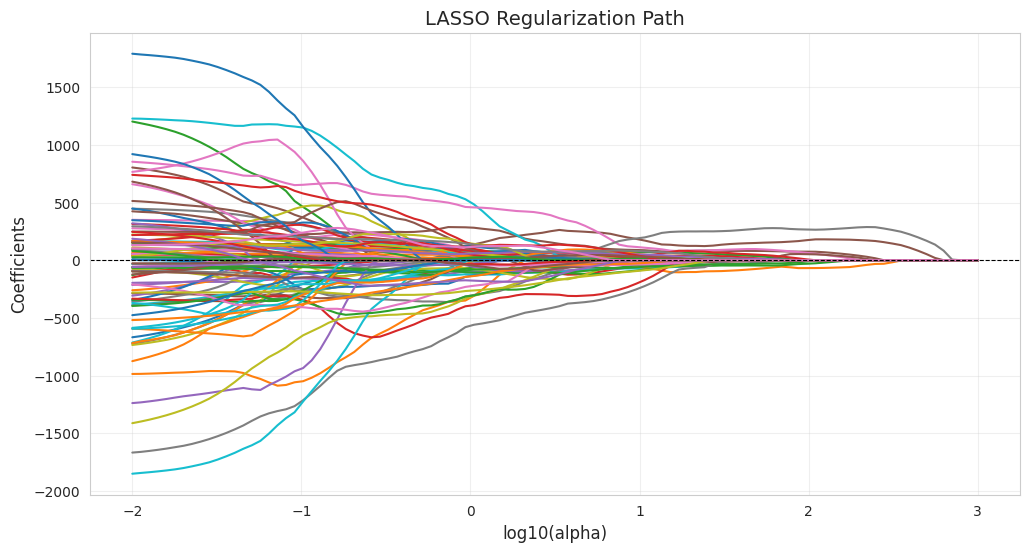

In [ ]:
# Plot how coefficients change with alpha
plt.figure(figsize=(12, 6))                     # create figure
plt.plot(np.log10(alphas), coef_path)           # plot coefficients vs log(alpha)
                                                # np.log10() takes log base 10
                                                # each line represents one predictor
plt.xlabel('log10(alpha)', fontsize=12)         # x-axis label
plt.ylabel('Coefficients', fontsize=12)         # y-axis label
plt.title('LASSO Regularization Path', fontsize=14)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
# axhline() draws horizontal line at y=0
plt.grid(True, alpha=0.3)                       # add grid
plt.show()

We create a sequence of 100  𝜆  (alpha) values using np.logspace(), which creates logarithmically-spaced values. Log spacing is appropriate because  𝜆  effects are multiplicative—changing  𝜆  from 0.1 to 1 has similar impact as changing from 10 to 100. We fit LASSO for each  𝜆  value and store the coefficients in a list, then convert to a numpy array. The resulting coef_path array has shape (100, 97): 100 rows (one per  𝜆 ) and 97 columns (one per predictor).

## Finding the Optimal $\lambda$ (alpha) using LASSO with Cross-Validation (`LassoCV`)

We just saw how `Lasso()` allows us to fit a model with a fixed regularization parameter (`alpha`). However, the choice of `alpha` is crucial for model performance. A small `alpha` might lead to overfitting (including too many predictors), while a large `alpha` might lead to underfitting (excluding important predictors).

To find the `alpha` value that provides the best trade-off between fitting the training data and generalizing to unseen data, we use **cross-validation**. `sklearn` provides the `LassoCV()` class specifically for this purpose.

`LassoCV()` automatically performs K-fold cross-validation across a range of potential `alpha` values and selects the `alpha` that minimizes the cross-validation error (typically the Mean Squared Error).

Key parameters for `LassoCV()`:

-   `alphas`: A list or array of `alpha` values to try. If `None`, a default grid is generated.
-   `cv`: Determines the cross-validation splitting strategy. Common choices are an integer (for K-fold cross-validation) or a cross-validation splitter object. Using an integer like `cv=10` specifies 10-fold cross-validation.
-   `random_state`: Ensures reproducibility of the cross-validation splits.

Let's use `LassoCV()` to find the optimal `alpha` for our crime data and see how it affects the selected features and coefficients. We'll use 10-fold cross-validation (`cv=10`).

In [ ]:
# Set random seed for reproducibility
np.random.seed(10)                              # set seed for reproducible splits

# Fit LASSO with cross-validation
lasso_cv = LassoCV(cv=10,                       # cv=10 specifies 10-fold cross-validation
                   fit_intercept=True,          # fit intercept
                   max_iter=10000,              # max iterations
                   random_state=10)             # random_state for reproducible folds
# LassoCV() automatically tries many alpha values
# and selects best via cross-validation

lasso_cv.fit(X_fl_scaled, Y)                    # .fit() performs CV and selects best alpha

print(f"Optimal alpha (lambda): {lasso_cv.alpha_:.4f}")
# .alpha_ contains selected alpha value
print(f"Number of non-zero coefficients: {np.sum(lasso_cv.coef_ != 0)}")
print(f"\nMean cross-validation error: {np.min(lasso_cv.mse_path_.mean(axis=1)):.2f}")
# .mse_path_ contains MSE for each alpha and each fold
# shape: (n_alphas, n_folds)
# .mean(axis=1) averages across folds for each alpha
# np.min() finds minimum average MSE

Optimal alpha (lambda): 50.1617
Number of non-zero coefficients: 14

Mean cross-validation error: 158368.01


The output above shows the results from running `sklearn`'s `LassoCV()`. This class automates the process of finding the best `alpha` (our $\lambda$) using cross-validation.

Here's a breakdown of the key outputs:

*   **`Optimal alpha (lambda): 50.1617`**
    *   The `.alpha_` attribute of the fitted `LassoCV` object stores the value of `alpha` that resulted in the lowest average cross-validation error across all the folds.
    *   **Interpretation:** Based on 10-fold cross-validation, `alpha = 50.1617` is the regularization strength that is estimated to provide the best performance (lowest MSE) on unseen data for this dataset.

*   **`Number of non-zero coefficients: 14`**
    *   The `.coef_` attribute of the `LassoCV` object stores the coefficients of the LASSO model fitted using the *entire* dataset, but with the `alpha` value that was determined to be optimal by cross-validation (`50.1617` in this case).
    *   **Interpretation:** With the optimal `alpha` of 50.1617, the LASSO model has selected 14 out of the 97 potential predictors. This means 83 coefficients have been shrunk exactly to zero. Compared to the 7 non-zero coefficients we saw with a manually chosen `alpha=150`, the optimal `alpha` selected slightly more variables, suggesting that these additional variables contribute to better predictive performance according to the cross-validation metric.

*   **`Mean cross-validation error: 158368.01`**
    *   The `.mse_path_` attribute contains the Mean Squared Error for each `alpha` value and for each fold during the cross-validation process. We calculated the average MSE across the folds for the optimal `alpha` (by taking the minimum of the average MSEs per alpha).
    *   **Interpretation:** This value (158368.01) is the average MSE obtained from the 10 cross-validation folds when using the optimal `alpha`. It serves as an estimate of how well this LASSO model (with optimal `alpha`) is expected to perform in terms of prediction error on new, unseen data.

By using `LassoCV`, we've let the data guide our choice of regularization strength, resulting in a model that balances complexity (number of features) and predictive performance.

In [ ]:
# Get mean CV error for each alpha
mean_mse = lasso_cv.mse_path_.mean(axis=1)      # average across folds
                                                # axis=1 means average across columns
std_mse = lasso_cv.mse_path_.std(axis=1)        # standard deviation across folds

# Get the alphas that were tried
alphas_tried = lasso_cv.alphas_                 # .alphas_ contains alpha values tried

print(f"Number of alpha values tried: {len(alphas_tried)}")
print(f"\nFirst 5 alpha values:")
print(alphas_tried[:5])
print(f"\nCorresponding mean MSE:")
print(mean_mse[:5])

Number of alpha values tried: 100

First 5 alpha values:
[711.02981689 663.10878696 618.41747407 576.73820609 537.86798127]

Corresponding mean MSE:
[676864.9317344  645044.70384375 592292.31710783 544952.43960837
 497897.1976181 ]


The output above provides more detail about the cross-validation process performed by `LassoCV`.

Here's what these outputs represent:

*   **`Number of alpha values tried: 100`**: This tells us how many different `alpha` values `LassoCV` evaluated during the cross-validation process to find the optimal one. `LassoCV` automatically generates a grid of `alpha` values if you don't provide one.
*   **`First 5 alpha values:`**: This shows the first few `alpha` values from the sequence that `LassoCV` tried. These are typically arranged from largest to smallest (strongest penalty to weakest).
*   **`Corresponding mean MSE:`**: This shows the average Mean Squared Error (MSE) across the 10 cross-validation folds for each of the corresponding `alpha` values listed above.

**Understanding the Mean MSE:**

For each `alpha` value that `LassoCV` tries, it performs the K-fold cross-validation process: it splits the data into K folds, trains the model on K-1 folds, tests on the remaining fold, and calculates the MSE. It repeats this K times, holding out a different fold each time. The "mean MSE" for a given `alpha` is the average of the K MSE values obtained from these K iterations. This average MSE is the estimate of the model's prediction error on unseen data for that specific `alpha`.

`LassoCV` then selects the `alpha` that has the *lowest* mean MSE, as this `alpha` is expected to give the best generalization performance.

The `.mse_path_.mean(axis=1)` calculation in the code explicitly computes these average MSE values across the folds for each `alpha` in the `lasso_cv.alphas_` list.

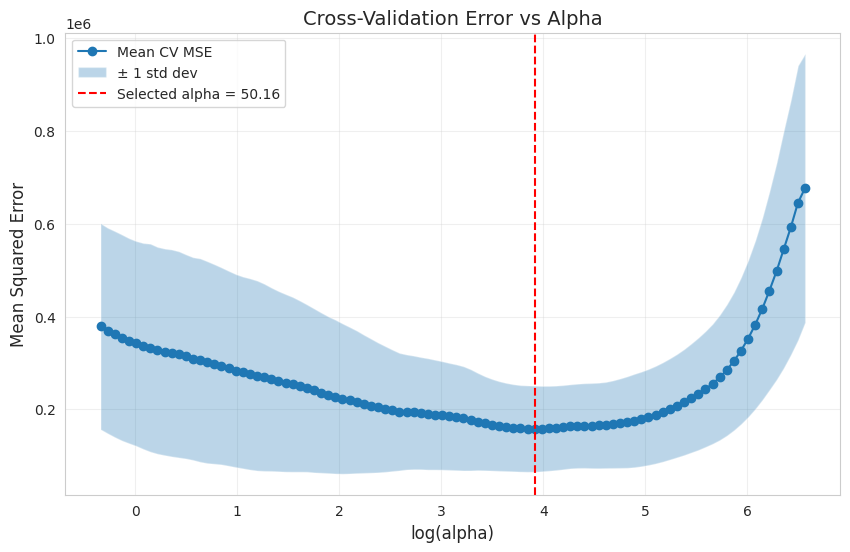

In [ ]:
# Plot cross-validation error vs alpha
plt.figure(figsize=(10, 6))
plt.plot(np.log(alphas_tried), mean_mse, 'o-', label='Mean CV MSE')
# 'o-' creates points connected by lines
plt.fill_between(np.log(alphas_tried),          # .fill_between() creates shaded region
                 mean_mse - std_mse,            # lower bound
                 mean_mse + std_mse,            # upper bound
                 alpha=0.3,                     # transparency
                 label='± 1 std dev')
plt.axvline(np.log(lasso_cv.alpha_), color='red', linestyle='--',
            label=f'Selected alpha = {lasso_cv.alpha_:.2f}')
# axvline() draws vertical line
plt.xlabel('log(alpha)', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Cross-Validation Error vs Alpha', fontsize=14)
plt.legend()                                    # display legend
plt.grid(True, alpha=0.3)
plt.show()

The plot above visualizes the results of the cross-validation performed by `LassoCV`. It shows how the estimated prediction error (Mean Squared Error) changes as we vary the regularization parameter ($\lambda$, or `alpha` in `sklearn`).

Let's interpret the key elements of the plot:

*   **X-axis: `log(alpha)`**: The x-axis represents the regularization parameter `alpha`, but plotted on a logarithmic scale (specifically, `log` base e, or `log10` is often used too). We use a log scale because the effect of `alpha` is often more pronounced at smaller values, and plotting on a log scale helps to visualize the changes across a wide range of `alpha` values more effectively. Larger values of `log(alpha)` correspond to larger `alpha` values, meaning stronger regularization and more shrinkage.
*   **Y-axis: `Mean Squared Error`**: The y-axis shows the Mean Squared Error (MSE). This is the average MSE across the cross-validation folds for each corresponding `alpha` value. The MSE is our measure of prediction error – lower MSE means better predictive performance.
*   **Blue Line (`o-`): Mean CV MSE**: This line connects the average MSE values calculated for each `alpha` tried during cross-validation. We are looking for the `alpha` value where this line reaches its minimum, as this represents the `alpha` that gives the lowest estimated prediction error on unseen data.
*   **Shaded Blue Region (`± 1 std dev`)**: The shaded area around the blue line represents the standard deviation of the MSE across the folds for each `alpha`. This gives us an idea of the variability in performance for a given `alpha` across different splits of the data. A wider shaded area indicates more variability, meaning the performance estimate might be less stable for that `alpha`.
*   **Red Dashed Line (`Selected alpha`)**: This vertical dashed line marks the `alpha` value that `LassoCV` automatically selected as optimal. This is the `alpha` that corresponds to the minimum point on the "Mean CV MSE" line.

**How to Interpret the Plot for Optimal Alpha:**

As we move from left to right on the plot (decreasing `log(alpha)`, meaning decreasing `alpha` and weaker regularization):

*   Initially (very large `alpha` on the far right), the MSE is high because the strong penalty has likely shrunk too many important coefficients to zero, resulting in an underfit model.
*   As `alpha` decreases, the MSE decreases. The model is becoming less penalized, allowing more potentially relevant predictors to have non-zero coefficients, improving the fit and reducing prediction error.
*   The MSE reaches a minimum point. This minimum corresponds to the `alpha` value that provides the best balance between fitting the training data and keeping the model simple enough to generalize well. This minimum is marked by the red dashed line.
*   As `alpha` continues to decrease further (towards the left), the MSE might start to increase again. This indicates that the model is becoming less regularized, potentially starting to include noisy predictors or overfitting the training data, leading to worse performance on unseen data.

The plot visually confirms that `LassoCV` has selected the `alpha` value that minimizes this estimated prediction error, giving us confidence that the chosen model is likely to perform well on new data.

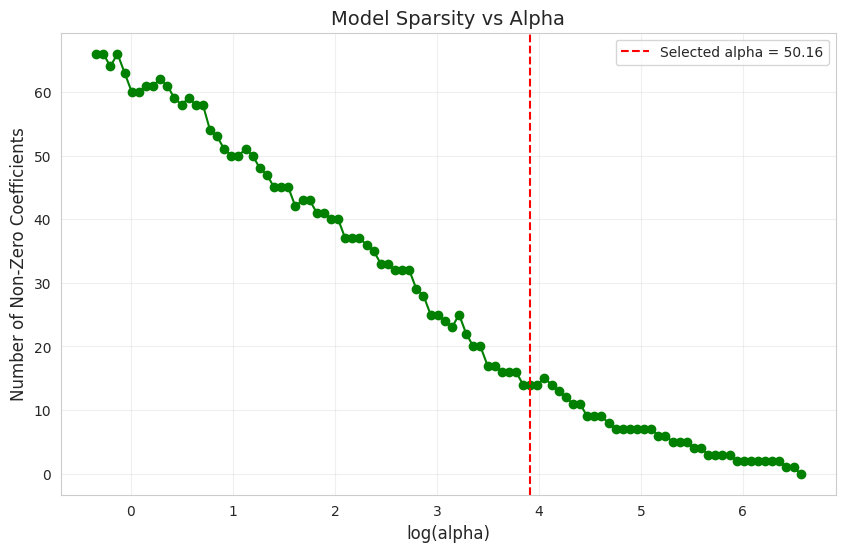

In [ ]:
# See how many coefficients are non-zero for different alphas
n_nonzero = []                                  # empty list for counts

for alpha in alphas_tried:                      # loop through alphas
    lasso = Lasso(alpha=alpha, fit_intercept=True, max_iter=10000)
    lasso.fit(X_fl_scaled, Y)
    n_nonzero.append(np.sum(lasso.coef_ != 0))  # count non-zero coefficients

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.log(alphas_tried), n_nonzero, 'o-', color='green')
plt.axvline(np.log(lasso_cv.alpha_), color='red', linestyle='--',
            label=f'Selected alpha = {lasso_cv.alpha_:.2f}')
plt.xlabel('log(alpha)', fontsize=12)
plt.ylabel('Number of Non-Zero Coefficients', fontsize=12)
plt.title('Model Sparsity vs Alpha', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The plot above visualizes how the **sparsity** of the LASSO model changes as we vary the regularization parameter (`alpha`).

Let's interpret the key elements:

*   **X-axis: `log(alpha)`**: Similar to the previous plot, the x-axis shows the regularization parameter `alpha` on a logarithmic scale. Larger `log(alpha)` values (to the right) mean stronger regularization.
*   **Y-axis: `Number of Non-Zero Coefficients`**: The y-axis shows the count of coefficients that are *not* exactly zero for the LASSO model fitted with the corresponding `alpha` value. This is a direct measure of the model's sparsity or the number of features selected.
*   **Green Line (`o-`)**: This line shows the number of non-zero coefficients for each `alpha` value that was tried.
*   **Red Dashed Line (`Selected alpha`)**: This vertical dashed line marks the optimal `alpha` value that `LassoCV` selected based on minimizing the cross-validation error (from the previous plot).

**How to Interpret the Plot:**

*   **Strong Regularization (large `alpha` on the right):** When `alpha` is very large, the penalty for having non-zero coefficients is high. As expected, the plot shows that the number of non-zero coefficients is very low, potentially even zero for extremely large `alpha`. The model is very sparse.
*   **Decreasing Regularization (moving left):** As `alpha` decreases, the penalty weakens. The plot shows that the number of non-zero coefficients gradually increases. As the penalty becomes less strict, more predictors are allowed to have non-zero coefficients if they help reduce the sum of squared errors.
*   **Weak Regularization (small `alpha` on the left):** When `alpha` is very small (approaching zero), the penalty is minimal. The number of non-zero coefficients approaches the total number of predictors (97 in our case), similar to a standard OLS model.

**Connecting to the Optimal Alpha:**

The red dashed line shows the `alpha` value that minimizes the cross-validation error (from the previous plot). By looking at where this line intersects the green line, we can see the **number of non-zero coefficients (and thus the model's sparsity)** at the chosen optimal regularization strength.

In this case, the plot confirms that at the optimal `alpha` selected by `LassoCV`, the model has a specific number of non-zero coefficients (which we saw was 14 in the output of the `LassoCV` cell). This plot visually reinforces how the chosen `alpha` balances model fit (minimizing MSE) with model complexity (number of features).

## Output Variables for the Optimal $\lambda$ (alpha) Chosen

After using `LassoCV` to find the optimal `alpha` that minimizes cross-validation error, we now have our final LASSO model. This model was fitted on the entire dataset using the optimal `alpha`.

The key output from this final model is the set of predictors that have **non-zero coefficients**. These are the variables that LASSO has identified as important for predicting the response, after applying the optimal amount of regularization.

Let's display these selected variables and their corresponding coefficients from the `LassoCV` object, which already holds the results for the optimal `alpha`.

In [ ]:
# Get non-zero coefficients from optimal model
coef_optimal = lasso_cv.coef_                   # coefficients at optimal alpha

# Create DataFrame
coef_df = pd.DataFrame({
    'Variable': predictor_names,
    'Coefficient': coef_optimal
})

# Filter to non-zero
coef_df_nonzero = coef_df[coef_df['Coefficient'] != 0].copy()
# .copy() creates independent copy
coef_df_nonzero = coef_df_nonzero.sort_values('Coefficient',
                                               key=abs,  # sort by absolute value
                                               ascending=False)  # largest first

print(f"\nVariables selected by LASSO (alpha = {lasso_cv.alpha_:.2f}):")
print(f"Total: {len(coef_df_nonzero)} variables\n")
print(coef_df_nonzero.to_string(index=False))

# Save variable names for later use
selected_vars = coef_df_nonzero['Variable'].tolist()
print(f"\nSelected variable names:")
print(selected_vars)


Variables selected by LASSO (alpha = 50.16):
Total: 14 variables

             Variable  Coefficient
  pct.kids.nvrmarried   272.886188
     pct.pop.underpov   150.299216
  num.kids.nvrmarried    95.920918
     male.pct.divorce    80.449739
     pct.kids2parents   -74.192945
    pct.house.nophone    47.901096
pct.youngkids2parents   -45.777794
         race.pcthisp    41.329622
        indian.percap    34.459525
   med.yr.house.built   -30.735312
           pct.retire   -19.967816
         asian.percap    16.266679
   pct.house.no.plumb    11.939175
          pct.workmom    -3.872611

Selected variable names:
['pct.kids.nvrmarried', 'pct.pop.underpov', 'num.kids.nvrmarried', 'male.pct.divorce', 'pct.kids2parents', 'pct.house.nophone', 'pct.youngkids2parents', 'race.pcthisp', 'indian.percap', 'med.yr.house.built', 'pct.retire', 'asian.percap', 'pct.house.no.plumb', 'pct.workmom']


The output you see above displays the variables that were selected by our LASSO model using the optimal `alpha` value determined by cross-validation (`alpha = {lasso_cv.alpha_:.2f}`).

Here's what the table shows:

*   **`Variable`**: This column lists the names of the predictor variables. These are the variables whose coefficients were *not* shrunk to exactly zero by the LASSO penalty with the optimal `alpha`. They are the features that LASSO deemed most important for predicting violent crime rates in Florida based on our data and regularization.
*   **`Coefficient`**: This column shows the estimated coefficient ($\hat{\beta}_j$) for each corresponding variable. These coefficients are from the LASSO model fitted on the *standardized* predictor data.
    *   The **magnitude** of the coefficient indicates the strength of the relationship between the predictor and the response (on the standardized scale). A larger absolute value means a stronger association.
    *   The **sign** of the coefficient (positive or negative) indicates the direction of the relationship. A positive coefficient means that as the predictor increases, the predicted violent crime rate tends to increase (holding other predictors constant). A negative coefficient means that as the predictor increases, the predicted violent crime rate tends to decrease.

**Key Takeaways from this Output:**

*   **Sparsity in Action:** The table explicitly lists only the 14 variables that have non-zero coefficients. This confirms that LASSO successfully performed variable selection, shrinking the coefficients of the other 83 predictors to zero.
*   **Identified Predictors:** These 14 variables are the ones that LASSO identified as being most predictive of violent crime rates, considering the balance between model fit and simplicity (controlled by the optimal `alpha`).
*   **Relative Importance:** By looking at the absolute values of the coefficients, you can get a sense of the relative importance of the selected predictors *on the standardized scale*. For example, `pct.kids.nvrmarried` has the largest absolute coefficient (272.89), suggesting it has the strongest association with violent crime rates among the selected variables when all variables are on the same scale.
*   **Direction of Association:** The signs tell us the direction. For instance, `pct.pop.underpov` (percentage of population under poverty) has a positive coefficient, suggesting a positive relationship with violent crime, while `pct.kids2parents` (percentage of kids in two-parent families) has a negative coefficient, suggesting a negative relationship.

This table is the culmination of our LASSO analysis – it presents the simplified model and the specific factors identified as most relevant for predicting violent crime rates in this dataset.

# 4. Final Model

LASSO produces a sparse solution, but it does not provide valid inference for variables selected. The LASSO estimates are biased toward zero due to the penalty. In our Crime Data study, we combine LASSO results and feed the selected variables to a linear model to have a final model with proper inference. This is called **Relaxed LASSO** or **Debiased LASSO**.

Let us recap the LASSO process and continue to build a final model.

## 4.1 LASSO Equation

First, let's summarize what we've done with LASSO:

**Step 1:** Prepare design matrix
- Extracted response $Y$
- Extracted predictors $X$ and standardized them

**Step 2:** Find variables selected by LASSO with cross-validation
- Used `LassoCV()` with 10-fold cross-validation
- Selected optimal $\lambda$ (alpha)
- Identified variables with non-zero coefficients

Now we'll fit a standard linear model using only the LASSO-selected variables to get unbiased estimates and valid inference.

## 4.2 Relaxed LASSO

To make inference using the LASSO-chosen variables, we run a linear model analysis using only the selected predictors. We assume all linear model assumptions are satisfied.

In [ ]:
# Create a temporary DataFrame with renamed columns for statsmodels
# statsmodels.formula.api can struggle with periods in column names
data_fl_renamed = data_fl[['violentcrimes.perpop'] + selected_vars].copy()
# Rename columns by replacing periods with underscores
data_fl_renamed.columns = data_fl_renamed.columns.str.replace('.', '_', regex=False)

# Update selected variable names to match the renamed columns for the formula
selected_vars_renamed = [var.replace('.', '_') for var in selected_vars]

# Create formula for linear model using the renamed variables
# We no longer need Q("") because names are valid identifiers without periods
formula = 'violentcrimes_perpop ~ ' + ' + '.join(selected_vars_renamed)

print(f"Formula for relaxed LASSO:")
print(formula)

# Fit linear model with selected variables using the renamed DataFrame
fit_relaxed = smf.ols(formula, data=data_fl_renamed).fit()
# smf.ols() fits OLS using formula
# .fit() estimates coefficients

print(f"\n{60*'='}")
print("RELAXED LASSO MODEL SUMMARY")
print(60*'=')
print(fit_relaxed.summary())

# Note: Coefficients from this OLS model are on the original scale of the data
# and provide standard statistical inference (p-values, confidence intervals).

Formula for relaxed LASSO:
violentcrimes_perpop ~ pct_kids_nvrmarried + pct_pop_underpov + num_kids_nvrmarried + male_pct_divorce + pct_kids2parents + pct_house_nophone + pct_youngkids2parents + race_pcthisp + indian_percap + med_yr_house_built + pct_retire + asian_percap + pct_house_no_plumb + pct_workmom

RELAXED LASSO MODEL SUMMARY
                             OLS Regression Results                             
Dep. Variable:     violentcrimes_perpop   R-squared:                       0.878
Model:                              OLS   Adj. R-squared:                  0.856
Method:                   Least Squares   F-statistic:                     38.71
Date:                  Thu, 09 Oct 2025   Prob (F-statistic):           1.47e-28
Time:                          10:11:01   Log-Likelihood:                -636.96
No. Observations:                    90   AIC:                             1304.
Df Residuals:                        75   BIC:                             1341.
Df Model:      

The output you see is the statistical summary table from the Ordinary Least Squares (OLS) model fitted using `statsmodels.formula.api`. This is our **Relaxed LASSO** model, where we used the 14 variables selected by LASSO with optimal `alpha` to fit a standard linear regression.

This summary table is rich with information. Let's break it down section by section:

**1. Model Information (Top Section):**

*   **`Dep. Variable: violentcrimes_perpop`**: Confirms that our response variable is `violentcrimes.perpop`.
*   **`Model: OLS`**: Confirms that we fitted a standard Ordinary Least Squares regression model.
*   **`Method: Least Squares`**: The method used to estimate the coefficients, which is minimizing the sum of squared errors.
*   **`No. Observations: 90`**: The number of communities (data points) used in the model.
*   **`Df Residuals: 75`**: Degrees of freedom for the residuals (n - p - 1, where n=90 observations and p=14 selected predictors).
*   **`Df Model: 14`**: Degrees of freedom for the model, which is the number of predictor variables (14).
*   **`R-squared: 0.878`**: This is the **coefficient of determination**. It tells us the proportion of the variance in the response variable (`violentcrimes.perpop`) that is predictable from the predictor variables in our model. A value of 0.878 means that about 87.8% of the variation in violent crime rates can be explained by the 14 variables selected by LASSO. This is a high R-squared, suggesting the model explains a large portion of the variability.
*   **`Adj. R-squared: 0.856`**: The **Adjusted R-squared** is a modified R-squared that accounts for the number of predictors in the model. It's generally a better measure for comparing models with different numbers of predictors, as it penalizes adding unnecessary variables. It's slightly lower than R-squared, as expected, but still high.
*   **`F-statistic: 38.71`**: This is the **overall F-statistic** for the model. It tests the null hypothesis that *all* the predictor coefficients (excluding the intercept) are simultaneously equal to zero.
*   **`Prob (F-statistic): 1.47e-28`**: This is the p-value associated with the F-statistic. A very small p-value (much less than 0.05) indicates that the null hypothesis can be rejected. In this case, the extremely small p-value (close to zero) strongly suggests that at least one of the predictors in the model is significantly related to violent crime rates. The model as a whole is statistically significant.

**2. Coefficient Table (Middle Section):**

This is the most detailed part, showing the estimated coefficients and their associated statistics for *each* predictor in the model (plus the intercept).

*   **`coef`**: This column shows the estimated **coefficient** ($\hat{\beta}_j$) for each variable. These coefficients are on the **original scale** of the variables.
    *   **Interpretation:** For a given predictor, the coefficient represents the estimated change in `violentcrimes.perpop` associated with a one-unit increase in that predictor, *holding all other predictors constant*. For example, the coefficient for `pct_pop_underpov` is 18.2338. This suggests that, on average, for every 1 percentage point increase in the population under poverty, the violent crime rate is estimated to increase by about 18.23, holding other factors constant. Similarly, `pct_kids2parents` has a coefficient of -10.6098, suggesting that for every 1 percentage point increase in the percentage of kids in two-parent families, the violent crime rate is estimated to decrease by about 10.61.
*   **`std err`**: The **standard error** of the coefficient estimate. This is a measure of the uncertainty or variability in the coefficient estimate. A smaller standard error means a more precise estimate.
*   **`t`**: The **t-statistic**. This is calculated as `coef` / `std err`. It measures how many standard errors the coefficient estimate is away from zero.
*   **`P>|t|`**: The **p-value** for the t-statistic. This is the probability of observing a t-statistic as extreme as, or more extreme than, the one calculated, *assuming the null hypothesis is true* (the null hypothesis for each coefficient is that the true population coefficient is zero).
    *   **Interpretation for Significance:** If the p-value is less than a chosen significance level (commonly 0.05), we reject the null hypothesis and conclude that the predictor is **statistically significant**. This suggests there is sufficient evidence to believe that the predictor is related to the response in the population, even after accounting for the other predictors in the model.
    *   Looking at the table: `pct_kids_nvrmarried` (0.027), `num_kids_nvrmarried` (0.004), and `indian_percap` (0.039) have p-values less than 0.05, indicating they are statistically significant predictors in this model at the 5% level. Other variables, like `pct_pop_underpov` (0.215) and `male_pct_divorce` (0.128), have p-values greater than 0.05, suggesting they are not statistically significant in this specific model *when controlling for the other selected variables*.
*   **`[0.025 0.975]`**: This is the **95% Confidence Interval** for the coefficient. It provides a range of values within which the true population coefficient is likely to fall with 95% confidence. If the confidence interval includes zero, the corresponding p-value will be greater than 0.05, and the coefficient is not statistically significant at the 5% level.

**3. Additional Statistics (Bottom Section):**

*   **`Omnibus`, `Prob(Omnibus)`, `Jarque-Bera (JB)`, `Prob(JB)`, `Skew`, `Kurtosis`**: These are tests and measures related to the **normality of the residuals**. Linear regression assumes that the errors (residuals) are normally distributed. These statistics help assess if that assumption is met. A small `Prob(Omnibus)` or `Prob(JB)` (e.g., < 0.05) suggests that the residuals are not normally distributed. In this case, `Prob(Omnibus)` (0.084) and `Prob(JB)` (0.0598) are borderline, suggesting the assumption might be approximately met, but it's worth noting.
*   **`Durbin-Watson: 1.784`**: Tests for **autocorrelation in the residuals**. A value close to 2 suggests no significant autocorrelation. 1.784 is reasonably close to 2.
*   **`Cond. No.: 9.88e+06`**: The **condition number**. This statistic assesses **multicollinearity** (high correlation) among the predictor variables. A high condition number (typically above 30) suggests significant multicollinearity. Our value of 9.88e+06 is very high, indicating that even among the 14 selected variables, there might still be strong correlations. This can make interpreting individual coefficients tricky and inflate their standard errors, even if the overall model fit is good. The note below the table explicitly points this out.

**In Summary:**

The Relaxed LASSO model provides a statistically interpretable model using the variables selected by LASSO. The R-squared shows a strong overall fit. The coefficient table allows us to see the estimated impact of each selected predictor on the original scale and assess their statistical significance using p-values and confidence intervals. While some variables are statistically significant, the high condition number warns us about potential multicollinearity among the selected predictors, which is important to keep in mind when interpreting the individual coefficient estimates.

## Technical Remark

The LASSO estimates are different from OLS estimates. Let's compare them:

In [ ]:
# Get LASSO coefficients (need to unscale them)
lasso_coef = coef_df_nonzero.set_index('Variable')['Coefficient']
# .set_index() makes Variable column the index
# ['Coefficient'] extracts that column as Series

# Get OLS coefficients (excluding intercept)
ols_coef = fit_relaxed.params[1:]               # [1:] excludes intercept
                                                # .params contains all coefficients

# Create comparison DataFrame
comparison = pd.DataFrame({
    'LASSO (scaled)': lasso_coef,
    'OLS': ols_coef
})

print("\nComparison of LASSO and OLS Estimates:")
print(comparison)

print(f"\n{60*'='}")
print("INTERPRETATION")
print(60*'=')
print("LASSO estimates tend to be smaller in absolute value due to shrinkage.")
print("LASSO coefficients are on the standardized scale.")
print("OLS coefficients are on the original scale with no shrinkage.")


Comparison of LASSO and OLS Estimates:
                       LASSO (scaled)        OLS
asian.percap                16.266679        NaN
asian_percap                      NaN   0.004839
indian.percap               34.459525        NaN
indian_percap                     NaN   0.004529
male.pct.divorce            80.449739        NaN
male_pct_divorce                  NaN  32.125696
med.yr.house.built         -30.735312        NaN
med_yr_house_built                NaN  -7.146480
num.kids.nvrmarried         95.920918        NaN
num_kids_nvrmarried               NaN   0.027698
pct.house.no.plumb          11.939175        NaN
pct.house.nophone           47.901096        NaN
pct.kids.nvrmarried        272.886188        NaN
pct.kids2parents           -74.192945        NaN
pct.pop.underpov           150.299216        NaN
pct.retire                 -19.967816        NaN
pct.workmom                 -3.872611        NaN
pct.youngkids2parents      -45.777794        NaN
pct_house_no_plumb           

## Technical Remark: Comparing LASSO and OLS Coefficient Estimates

We have now seen two sets of coefficient estimates for the variables that LASSO selected:

1.  The coefficients from the LASSO model fitted with the optimal `alpha` (these were on the *standardized* scale).
2.  The coefficients from the OLS model fitted using *only* the selected variables (these are on the *original* scale of the data).

It's important to understand the differences between these two sets of estimates and why they are not the same. Let's look at the comparison table generated in the previous cell:

**Comparison of LASSO (scaled) and OLS Estimates:**

This table lists the variables selected by LASSO and shows their estimated coefficients from both the LASSO model (fitted on scaled data) and the OLS model (fitted on original data). You'll notice that the values in the 'LASSO (scaled)' column are generally different from those in the 'OLS' column.

**Why the Difference?**

There are two main reasons for the differences in coefficient values:

1.  **Standardization vs. Original Scale:** The most obvious reason is the scale of the predictors. The LASSO coefficients were estimated when the predictor variables had been standardized to have a mean of 0 and a standard deviation of 1. The OLS coefficients, however, were estimated using the predictor variables on their original scales (e.g., population in raw counts, income in dollars, percentages as they are). A one-unit change on a standardized scale is very different from a one-unit change on the original scale.
2.  **Shrinkage (LASSO) vs. No Shrinkage (OLS):** This is a more fundamental difference.
    *   The **LASSO coefficients** are the result of minimizing the sum of squared errors *plus* the L1 penalty ($\lambda \sum |\beta_j|$). This penalty actively shrinks the coefficient estimates towards zero. Even for the variables that are not shrunk entirely to zero, their coefficients are still pulled towards zero compared to what they would be in a standard OLS fit. This shrinkage helps with variable selection and can improve prediction accuracy by reducing variance, but it makes the coefficients biased.
    *   The **OLS coefficients**, on the hand, are obtained by minimizing *only* the sum of squared errors, with no penalty applied to the coefficients. Assuming the set of selected predictors is correctly specified, OLS provides the **unbiased** estimates of the coefficients. These coefficients are not shrunk towards zero and reflect the estimated linear relationship between each predictor and the response on the original scale, holding other selected predictors constant.

**Interpreting the Comparison:**

Let's look at a couple of examples from the table to see these differences in action:

*   **`pct_kids_nvrmarried`:** The LASSO coefficient on the *scaled* data is **272.89**, while the OLS coefficient on the *original* data is **70.47**. The large difference in magnitude is primarily due to the difference in scale. The LASSO coefficient tells us the impact of a one standard deviation change in the standardized variable, while the OLS coefficient tells us the impact of a one percentage point change on the original scale.
*   **`num_kids_nvrmarried`:** The LASSO coefficient on the *scaled* data is **95.92**, while the OLS coefficient on the *original* data is **0.03**. Again, the scales are very different. The OLS coefficient indicates that for every one unit increase in the *raw count* of kids in never-married households, the violent crime rate is estimated to increase by a very small amount (0.03), holding other factors constant. The LASSO coefficient reflects its relative importance on a standardized scale.
*   **`male_pct_divorce`:** The LASSO coefficient on the *scaled* data is **80.45**, while the OLS coefficient on the *original* data is **32.13**. Both indicate a positive relationship, but the values differ due to scaling and LASSO's shrinkage.

The 'LASSO (scaled)' column shows the relative importance and direction of effect for each selected predictor *when all predictors are on a comparable scale*. The magnitudes here tell us which standardized predictors have the strongest association with the response in the LASSO model with optimal regularization.

The 'OLS' column provides the estimated change in the response variable (violent crime rate) for a one-unit increase in each predictor *on its original scale*, while holding other *selected* predictors constant. These are the coefficients we would typically use for interpretation and inference in the Relaxed LASSO approach because they are unbiased and on a meaningful scale.

In summary, the LASSO (scaled) coefficients are useful for understanding variable selection and relative importance on a standardized scale under regularization, while the OLS coefficients from the relaxed model provide unbiased estimates on the original scale for interpretation and inference on the selected subset of variables.

## 4.3 LASSO Prediction

Although we use relaxed LASSO for inference and final reporting, we can still use the LASSO model directly for prediction.

In [ ]:
# Make prediction for first observation
X_new = X_fl_scaled[0:1, :]                     # select first row
                                                # [0:1, :] keeps it as 2D array (not 1D)
                                                # : means all columns

y_pred_lasso = lasso_cv.predict(X_new)          # .predict() computes prediction
                                                # uses LASSO coefficients
y_actual = Y[0]                                 # actual value

print(f"Prediction using LASSO model:")
print(f"  Predicted: {y_pred_lasso[0]:.2f}")
print(f"  Actual: {y_actual:.2f}")
print(f"  Error: {y_actual - y_pred_lasso[0]:.2f}")

Prediction using LASSO model:
  Predicted: 546.46
  Actual: 560.71
  Error: 14.25


The code in the previous cell demonstrates how to use our fitted LASSO model (`lassocv`) to make a prediction on a new data point.

Here's what the code does and how to interpret the output:

1.  **`X_new = X_fl_scaled[0:1, :]`**: We select the first observation from our *scaled* predictor data (`X_fl_scaled`) to use as our new data point for prediction. We keep it as a 2D array (`[0:1, :]`) because `sklearn`'s `predict` method expects input in this format, even for a single observation.
2.  **`y_pred_lasso = lassocv.predict(X_new)`**: We use the `.predict()` method of our fitted `LassoCV` object (which holds the model with the optimal alpha) to generate a predicted violent crime rate for the `X_new` data point.
3.  **`y_actual = Y[0]`**: We retrieve the actual violent crime rate for the first observation from our original response variable `Y`.

**Interpreting the Output:**

*   **`Predicted: 546.46`**: This is the violent crime rate predicted by our optimal LASSO model for the first community in the dataset.
*   **`Actual: 560.71`**: This is the actual, observed violent crime rate for that same community.
*   **`Error: 14.25`**: This is the difference between the actual and predicted values (`Actual - Predicted`). In this specific case, the model slightly *underpredicted* the violent crime rate for this community by 14.25.

This output gives us a concrete example of how well our LASSO model performs on a single data point. The small error (14.25 relative to values around 500) suggests the model is reasonably accurate for this particular observation. Keep in mind that this is just one example; to fully evaluate the model, we would look at performance metrics across the entire dataset or a separate test set.

## 4.4 Findings

Out of a large number of factors (97 predictors), LASSO identified a smaller set of important variables related to violent crime rates in Florida. We see that:

- Family structure variables are very important (e.g., variables related to kids, divorce, never-married)
- Socioeconomic factors matter (e.g., poverty-related variables)
- Housing characteristics play a role

The relaxed LASSO model provides interpretable coefficients with statistical inference, while maintaining the parsimony achieved by LASSO variable selection.

# 5. Summary

Given a set of variables and response, we can use LASSO to choose a set of variables:

1. We solve a penalized least squared problem with $L_1$ penalty
2. Among many possible sparse models, we use K-fold Cross Validation to choose $\lambda$
3. Python's sklearn library (`Lasso` and `LassoCV`) provides the LASSO solutions
4. The selected variables can be fitted again using standard linear regression to get valid inference (relaxed LASSO)
5. LASSO is particularly useful when:
   - $p$ is large relative to $n$
   - We believe only a subset of variables are truly important
   - We want automatic variable selection
   - Prediction accuracy is the primary goal

# 6. Appendices

## Regularization in General: Beyond Just LASSO

We've focused heavily on LASSO ($L_1$ regularization) because of its ability to perform automatic variable selection, which was particularly useful for our high-dimensional crime data ($p > n$). However, regularization is a broader concept, and we can use other types of penalties to control model complexity.

The general form of a penalized linear regression model objective function combines both the $L_1$ and $L_2$ penalties:

$ \min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \left( \frac{1-\alpha}{2}||\beta||_2^2 + \alpha ||\beta||_1 \right) \right\} $

Let's break down the components of this objective function and the roles of the two tuning parameters:

*   *$\frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$*: This is the familiar Mean Squared Error (MSE) term. Our primary goal is always to minimize the difference between our model's predictions and the actual values.
*   *$\lambda \left( \frac{1-\alpha}{2}||\beta||_2^2 + \alpha ||\beta||_1 \right)$*: This is the **combined penalty term**. It's a weighted average of the $L_2$ penalty and the $L_1$ penalty, scaled by the overall regularization strength $\lambda$.
    *   *$||\beta||_2^2 = \sum_{j=1}^{p}\beta_j^2$*: This is the squared **$L_2$ Norm** of the coefficients. It penalizes the squared values of the coefficients. This is the penalty used in **Ridge Regression**. It shrinks coefficients towards zero but doesn't typically set them exactly to zero.
    *   $||\beta||_1 = \sum_{j=1}^{p}|\beta_j|$: This is the **$L_1$ Norm** of the coefficients. It penalizes the absolute values of the coefficients. This is the penalty used in **LASSO**. It encourages sparsity by potentially setting some coefficients exactly to zero.

**The Two Tuning Parameters:**

In this general form, we have *two* tuning parameters that control the regularization:

1.  **$\lambda$ (Lambda): Overall Regularization Strength**
    *   $\lambda$ is a non-negative value that controls the *total amount* of regularization applied.
    *   If $\lambda = 0$, the entire penalty term disappears, and we are back to minimizing just the MSE, which gives us the standard OLS solution.
    *   As $\lambda$ increases, the penalty becomes stronger, forcing the coefficients (or a combination of their squared and absolute values) further towards zero.
    *   As $\lambda \rightarrow \infty$, all coefficients will be forced to zero, resulting in a model that simply predicts the mean of the response.

2.  **$\alpha$ (Alpha): The Mix between L1 and L2**
    *   $\alpha$ is a value between 0 and 1 ($0 \leq \alpha \leq 1$). It controls the *mix* or *balance* between the $L_1$ and $L_2$ penalties.
    *   **If $\alpha = 1$**: The term $\frac{1-\alpha}{2}||\beta||_2^2$ becomes $\frac{1-1}{2}||\beta||_2^2 = 0 \cdot ||\beta||_2^2 = 0$. The penalty term simplifies to $\lambda (0 + 1 \cdot ||\beta||_1) = \lambda ||\beta||_1$. This is exactly the **LASSO** penalty! So, setting $\alpha=1$ gives us pure LASSO.
    *   **If $\alpha = 0$**: The term $\alpha ||\beta||_1$ becomes $0 \cdot ||\beta||_1 = 0$. The penalty term simplifies to $\lambda \left( \frac{1-0}{2}||\beta||_2^2 + 0 \right) = \lambda \frac{1}{2}||\beta||_2^2$. This is the **Ridge Regression** penalty (with a factor of 1/2, which doesn't change the optimization but affects the scale of $\lambda$). So, setting $\alpha=0$ gives us pure Ridge Regression.
    *   **If $0 < \alpha < 1$**: The penalty term includes *both* the $L_1$ and $L_2$ norms. This is called **Elastic Net** regularization. Elastic Net combines the properties of both LASSO and Ridge: it performs variable selection (like LASSO) and also handles correlated predictors well (like Ridge).



This general formulation shows that Ridge, LASSO, and Elastic Net are all part of the same family of penalized linear models.

*   $\lambda$ controls the *overall strength* of the penalty and thus the total amount of shrinkage.
*   $\alpha$ controls the *type* of penalty, determining whether it's pure L1 (LASSO, $\alpha=1$), pure L2 (Ridge, $\alpha=0$), or a mix of both (Elastic Net, $0 < \alpha < 1$).

Choosing the right values for both $\lambda$ and $\alpha$ (typically using cross-validation, similar to how we chose $\lambda$ for LASSO) is crucial for finding the best model for a given dataset.

### 6.1.1 Ridge Regression - $L_2$ Norm

Ridge regression uses the $L_2$ penalty instead of $L_1$. sklearn provides `Ridge()` and `RidgeCV()` for this purpose.


Optimal alpha for Ridge: 155.5676
Number of non-zero coefficients: 97


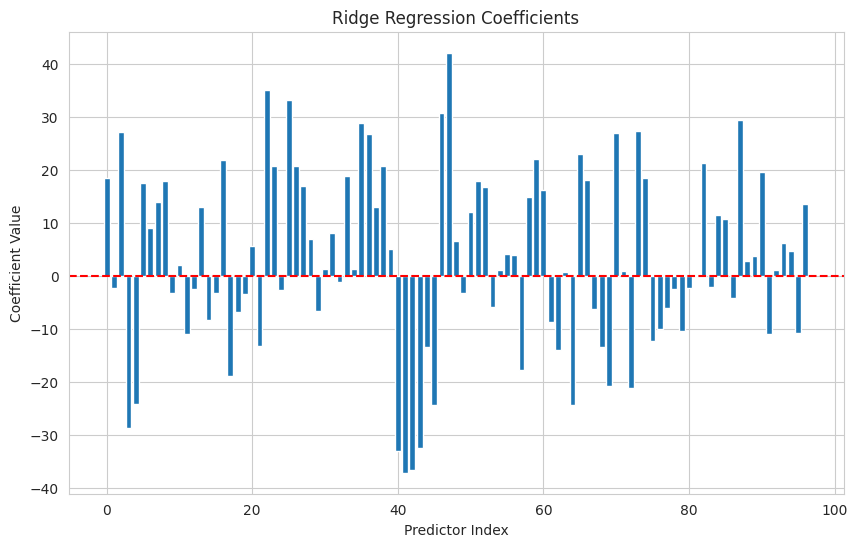

In [ ]:
# Fit Ridge regression with cross-validation
ridge_cv = RidgeCV(cv=10,                       # 10-fold cross-validation
                   fit_intercept=True,          # fit intercept
                   alphas=np.logspace(-2, 3, 100))
# alphas= specifies alpha values to try
# np.logspace() creates log-spaced sequence

ridge_cv.fit(X_fl_scaled, Y)                    # fit Ridge with CV

print(f"Optimal alpha for Ridge: {ridge_cv.alpha_:.4f}")
print(f"Number of non-zero coefficients: {np.sum(ridge_cv.coef_ != 0)}")

# Plot Ridge coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(ridge_cv.coef_)), ridge_cv.coef_)
plt.xlabel('Predictor Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

Ridge regression sets $\alpha=0$ in the general penalty, using only the $L_2$ penalty. The key difference from LASSO:
- **Ridge coefficients are NEVER exactly zero** (no variable selection)
- Ridge only shrinks coefficients toward zero
- All variables remain in the model

The plot shows that all 97 coefficients are non-zero, though many are small. Ridge regression is useful when:
- We believe many variables have small effects
- We want to reduce overfitting but keep all variables
- Multicollinearity is a problem (Ridge handles this better than OLS)

However, Ridge does not perform variable selection, making it less interpretable than LASSO when $p$ is large.

### 6.1.2 Elastic Net

Elastic Net combines Ridge ($L_2$) and LASSO ($L_1$) by choosing $0 < \alpha < 1$. An $\alpha$ near 0 emphasizes Ridge. An $\alpha$ near 1 emphasizes LASSO.

In [ ]:
# Fit Elastic Net with alpha = 0.99 (close to LASSO)
enet_cv = ElasticNetCV(l1_ratio=0.99,           # l1_ratio corresponds to alpha
                       cv=10,                   # 10-fold CV
                       fit_intercept=True,
                       max_iter=10000,
                       random_state=10)

enet_cv.fit(X_fl_scaled, Y)                     # fit Elastic Net

print(f"Optimal alpha (lambda): {enet_cv.alpha_:.4f}")
print(f"L1 ratio (alpha): {enet_cv.l1_ratio}")
print(f"Number of non-zero coefficients: {np.sum(enet_cv.coef_ != 0)}")

# Get selected variables
enet_selected = [predictor_names[i] for i in range(len(predictor_names))
                 if enet_cv.coef_[i] != 0]
# list comprehension: iterate through indices
# include name if coefficient is non-zero

print(f"\nElastic Net selected variables:")
for var in enet_selected:
    print(f"  {var}")

Optimal alpha (lambda): 35.7456
L1 ratio (alpha): 0.99
Number of non-zero coefficients: 38

Elastic Net selected variables:
  population
  race.pctblack
  race.pctwhite
  race.pctasian
  race.pcthisp
  age.pct16to24
  pct.pubasst.inc
  pct.retire
  indian.percap
  asian.percap
  pct.pop.underpov
  pct.less9thgrade
  pct.not.hsgrad
  pct.occup.manuf
  male.pct.divorce
  male.pct.nvrmarried
  total.pct.divorce
  pct.fam2parents
  pct.kids2parents
  pct.youngkids2parents
  pct.teens2parents
  pct.workmom
  num.kids.nvrmarried
  pct.kids.nvrmarried
  pct.immig.recent8
  pct.immig.recent10
  pct.english.only
  pct.fam.hh.large
  pct.people.ownoccup.hh
  pct.people.dense.hh
  pct.house.ownoccup
  pct.house.vacant
  med.yr.house.built
  pct.house.nophone
  pct.house.no.plumb
  rent.qrange
  num.in.shelters
  pct.born.samestate


Elastic Net with `l1_ratio=0.99` uses 99% LASSO penalty and 1% Ridge penalty. This provides:
- Variable selection from LASSO (sparse solutions)
- Stability from Ridge (better handles correlated predictors)

Elastic Net is particularly useful when:
- Predictors are highly correlated (groups of related variables)
- We want variable selection but more stability than pure LASSO
- LASSO performs poorly due to correlation structure

The small amount of $L_2$ penalty helps when groups of correlated variables exist—Elastic Net tends to select or exclude them together, while pure LASSO might arbitrarily select one from the group.

In [ ]:
# Compare all three methods
comparison_df = pd.DataFrame({
    'Method': ['LASSO', 'Ridge', 'Elastic Net (0.99)'],
    'Optimal Lambda': [lasso_cv.alpha_, ridge_cv.alpha_, enet_cv.alpha_],
    'Non-Zero Coefs': [np.sum(lasso_cv.coef_ != 0),
                       np.sum(ridge_cv.coef_ != 0),
                       np.sum(enet_cv.coef_ != 0)]
})

print(f"\n{60*'='}")
print("COMPARISON OF REGULARIZATION METHODS")
print(60*'=')
print(comparison_df.to_string(index=False))


COMPARISON OF REGULARIZATION METHODS
            Method  Optimal Lambda  Non-Zero Coefs
             LASSO       50.161748              14
             Ridge      155.567614              97
Elastic Net (0.99)       35.745577              38


This comparison shows the key differences:
- **LASSO:** Produces sparse models (few non-zero coefficients), performs variable selection
- **Ridge:** Keeps all variables (all non-zero coefficients), only shrinks magnitudes
- **Elastic Net:** Middle ground, typically more sparse than Ridge but more stable than LASSO

The choice depends on the problem:
- Use LASSO when you believe only a few variables matter
- Use Ridge when you believe many variables have small effects
- Use Elastic Net when predictors are correlated or you want a compromise

## 6.2 Appendix 2: Honest Model Evaluation

To get an honest assessment of prediction performance, we should evaluate our final model on a held-out test set that was never used for:
- Variable selection
- Hyperparameter tuning
- Any model building decisions

Let's demonstrate this with a train/test split.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train (70%) and test (30%)
np.random.seed(42)                              # set seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X_fl, Y,                                    # features and response
    test_size=0.3,                              # 30% for testing
    random_state=42)                            # seed for reproducibility
# train_test_split() randomly splits data
# returns 4 arrays: X_train, X_test, y_train, y_test

print(f"Training set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")

# Standardize using training data statistics
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
# .fit_transform() computes mean/std from training data and scales
X_test_scaled = scaler_train.transform(X_test)
# .transform() uses training statistics to scale test data
# IMPORTANT: use same scaler fitted on training data

# Fit LASSO on training data only
lasso_cv_train = LassoCV(cv=10, fit_intercept=True,
                         max_iter=10000, random_state=42)
lasso_cv_train.fit(X_train_scaled, y_train)

# Evaluate on test data
y_pred_train = lasso_cv_train.predict(X_train_scaled)
y_pred_test = lasso_cv_train.predict(X_test_scaled)

train_mse = np.mean((y_train - y_pred_train)**2)
test_mse = np.mean((y_test - y_pred_test)**2)

print(f"\n{60*'='}")
print("MODEL PERFORMANCE")
print(60*'=')
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {np.sqrt(test_mse):.2f}")

Training set size: 63
Test set size: 27

MODEL PERFORMANCE
Training MSE: 80275.33
Test MSE: 146388.82
Test RMSE: 382.61


We split the data into training (70%) and test (30%) sets using `train_test_split()`. Critical points:

1. **Standardization:** We fit the scaler on training data only (`.fit_transform()`), then apply those same mean/std values to test data (`.transform()`). Never fit the scaler on test data—this would leak information.

2. **Model building:** We fit LASSO using only training data, including cross-validation for $\lambda$ selection.

3. **Evaluation:** We compute MSE on both training and test sets. Training MSE is typically lower (optimistic) because the model was fit to that data. Test MSE provides an honest estimate of performance on new data.

If test MSE is much larger than training MSE, we have evidence of overfitting. If they're similar, the model generalizes well.

# Final Remarks

In this lecture we covered:

1. **The Problem:** When $p > n$ or $p$ is large, OLS fails or produces uninterpretable models

2. **The Solution:** LASSO adds an $L_1$ penalty to produce sparse models
   - Performs automatic variable selection
   - Shrinks coefficients toward zero
   - Controlled by tuning parameter $\lambda$

3. **Implementation:**
   - `Lasso()` for single $\lambda$
   - `LassoCV()` for cross-validation to select $\lambda$
   - Always standardize predictors

4. **Inference:** Use relaxed LASSO (refit with OLS on selected variables) for valid statistical inference

5. **Alternatives:**
   - Ridge regression ($L_2$ penalty) for when all variables matter
   - Elastic Net for correlated predictors

6. **Evaluation:** Use held-out test data for honest performance assessment

LASSO is a powerful tool for high-dimensional data and is widely used in modern statistics and machine learning.